In [1]:
import pandas as pd
from scipy.stats import chi2_contingency,f_oneway
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import joblib

In [2]:
Data=pd.read_excel("data.xlsx")

In [20]:
Processed=pd.read_excel("Processed.xlsx")

In [33]:
Column="returned_amount"
print(np.nanmean(Processed.loc[Processed.age!=0,Column].astype(int)))
print(np.std(Processed.loc[Processed.age!=0,Column]))

84.56407441509077
389.8722376820913


In [22]:
Processed

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,...,returned_amount,pay_method,Total_Sales,new_language,Sales,normDuration,normBytes,new_country,new_date,Label
0,2017-03-18 18:06:40.202,3366,2,81.136.18.247,1723,0,34,0,CA,0,...,0.000,Cash,1500.400,1,above_1000,0.533143,0.001817,2,3,0
1,2017-03-16 03:03:13.400,3086,2,46.248.189.251,589,0,20,1,US,0,...,0.000,Cash,1500.400,1,above_1000,0.453143,0.000601,14,3,0
2,2017-03-20 08:40:55.678,4295,2,45.19.208.35,307,2,0,1,CA,2,...,1080.306,Cash,1080.306,1,above_1000,0.798571,0.000299,2,3,0
3,2017-03-20 08:40:55.678,2239,2,45.210.174.91,391,2,0,0,AT,2,...,2677.500,Credit Card,2677.500,1,above_1000,0.211143,0.000389,0,3,0
4,2017-03-20 08:38:07.870,3806,3,45.21.22.245,76,3,0,0,NO,2,...,1140.304,Credit Card,1140.304,1,above_1000,0.658857,0.000051,9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172833,2017-03-21 13:20:28.026,2337,2,12.31.244.14,40,3,0,1,CA,2,...,0.000,Credit Card,0.000,1,no_sales,0.239143,0.000013,2,3,5
172834,2017-03-18 21:27:30.328,4366,2,114.40.32.161,46,4,0,2,GB,1,...,0.000,Credit Card,0.000,1,no_sales,0.818857,0.000019,5,3,5
172835,2017-03-18 22:55:40.792,4922,2,188.230.14.49,264,3,0,2,IT,1,...,0.000,Debit Card,0.000,7,no_sales,0.977714,0.000253,7,3,5
172836,2017-03-18 22:56:00.381,1509,2,188.239.8.163,220,5,0,2,IT,1,...,0.000,Credit Card,0.000,7,no_sales,0.002571,0.000206,7,3,5


In [13]:
Data

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.00,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.00,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.00,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.00,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.00,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172833,2017-03-16 11:42:01.298,4372,TCP,94.197.121.229,100600,Android App,NaN,Male,US,Normal,English,0.0000,Yes,143.36,Debit Card
172834,2017-03-16 12:10:17.340,2167,TCP,129.110.241.72,30400,Android App,NaN,Female,IT,Normal,English,15.1500,No,0.00,Cash
172835,2017-03-16 12:10:17.340,2725,TCP,185.119.252.121,100300,Android App,NaN,Female,IT,Normal,English,600.1600,No,0.00,Credit Card
172836,2017-03-16 15:52:58.342,3728,TCP,185.145.107.23,50200,Android App,NaN,Male,US,Normal,Russian,75.7500,No,0.00,Cash


In [31]:
Column="returned"
print(np.nanmean(Data.loc[:,Column].astype(int)))
print(np.std(Data.loc[:,Column]))

ValueError: invalid literal for int() with base 10: 'No'

In [32]:
Column="returned"
print(Data.loc[:,Column].value_counts())

returned
No     150274
Yes     22564
Name: count, dtype: int64


In [28]:
len(Data.country.value_counts())

27

In [19]:
Data.sales.astype("float")

0         261.9600
1         731.9400
2          14.6200
3         957.5775
4          22.3680
            ...   
172833      0.0000
172834     15.1500
172835    600.1600
172836     75.7500
172837     23.4600
Name: sales, Length: 172838, dtype: float64

In [29]:
Data.loc[Data.sales=="no_sales"]

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method,Total_Sales


In [6]:
Data["Total_Sales"]=Data.sales+Data.returned_amount

In [26]:
for val in Data.returned_amount.unique():
    if str(int(val)).isnumeric()==False:
        print(val)

In [151]:
for col in Data.columns:
    print(f"{col}:={Data.loc[pd.isna(Data.loc[:,col])].shape[0]}") 

accessed_date:=0
duration_(secs):=0
network_protocol:=0
ip:=0
bytes:=0
accessed_Ffom:=0
age:=73381
gender:=0
country:=0
membership:=0
language:=0
sales:=0
returned:=0
returned_amount:=0
pay_method:=0
Total_Sales:=0


In [3]:
Data.age=Data.age.fillna(0)

In [4]:
Data.loc[Data.loc[:,"age"]=="--","age"]=0

In [30]:
Data.loc[:,["duration_(secs)","bytes","age","Total_Sales"]].corr()

,duration_(secs),bytes,age,Total_Sales
duration_(secs),1.000000,0.004571,0.004295,-0.000674
bytes,0.004571,1.000000,0.009610,0.010317
age,0.004295,0.009610,1.000000,0.023892
Total_Sales,-0.000674,0.010317,0.023892,1.000000


In [8]:
Data["Sales"]=Data.Total_Sales>0

In [209]:
categories=[[1,25],[25,75],[75,200],[200,1000],[1000,100000]]
cat_labels=["below_25","below_75","below_200","below_1000","above_1000"]

# categories=[[1,100],[100,1000],[1000,100000]]
# cat_labels=["below_100","below_1000","above_1000"]

In [210]:
Data.loc[Data.Total_Sales==0,"Sales"]="no_sales"
i=0
for boundary in categories:
    Data.loc[(Data.Total_Sales<boundary[1]) & (Data.Total_Sales>=boundary[0]),"Sales"]=cat_labels[i]
    i+=1

In [211]:
Data.loc[:,"Sales"].value_counts()

Sales
below_1000    35372
below_25      31017
below_75      30084
below_200     29443
above_1000    28148
no_sales      18774
Name: count, dtype: int64

In [207]:
crosstab = pd.crosstab(Data.Sales, Data.age)
crosstab

age,0,18,19,20,21,22,23,24,25,26,...,60,61,62,63,64,65,66,67,68,69
Sales,,,,,,,,,,,,,,,,,,,,,
above_1000,13900,263,278,251,282,295,302,314,280,279,...,278,287,271,287,286,240,265,264,275,275
below_1000,16127,344,369,373,367,393,379,374,359,371,...,355,385,377,375,412,360,342,389,352,345
below_200,13389,298,322,309,305,343,289,304,307,300,...,288,315,332,289,323,310,305,301,296,314
below_25,12944,305,359,313,350,380,323,369,351,331,...,342,347,338,332,357,321,344,360,372,341
below_75,13103,332,325,321,326,335,299,337,307,345,...,307,339,310,297,327,321,341,318,328,332
no_sales,18661,3,0,1,2,1,1,2,5,3,...,7,1,0,2,2,0,2,0,1,5


In [208]:
chi2_contingency(crosstab.iloc[:,1:])

Chi2ContingencyResult(statistic=260.18678803656707, pvalue=0.3983531065595569, dof=255, expected_freq=array([[259.85268078, 278.01714002, 263.72103784, 274.48516184,
        293.82694714, 267.92577378, 285.92204358, 270.61680478,
        273.98059353, 279.36265552, 277.68076115, 270.2804259 ,
        285.58566471, 269.27128928, 269.94404703, 272.63507803,
        269.60766815, 261.19819628, 273.47602521, 297.86349364,
        278.18532946, 279.86722384, 284.40833865, 276.50343509,
        276.67162452, 287.94031683, 267.92577378, 262.71190122,
        273.13964634, 268.43034209, 282.89463371, 269.10309984,
        270.11223647, 287.26755908, 279.19446609, 271.79413084,
        263.55284841, 260.69362797, 275.99886678, 273.98059353,
        270.95318365, 268.9349104 , 265.23474278, 281.54911821,
        273.81240409, 266.07568997, 287.09936964, 261.03000685,
        268.9349104 , 274.48516184, 273.13964634, 271.12137309],
       [350.98714498, 375.52216871, 356.21219633, 370.75146965,
 

In [134]:
Data.columns

Index(['accessed_date', 'duration_(secs)', 'network_protocol', 'ip', 'bytes',
       'accessed_Ffom', 'age', 'gender', 'country', 'membership', 'language',
       'sales', 'returned', 'returned_amount', 'pay_method', 'Total_Sales',
       'Sales'],
      dtype='object')

In [11]:
for col in ["network_protocol","age","accessed_Ffom","gender","country","membership"]:
    values=[]
    for cat in Data.loc[:,col].unique():
        values.append(Data.loc[Data.loc[:,col]==cat,"Sales"].to_numpy())
    tmp=f_oneway(*values)
    print(f"{col}: {tmp.pvalue}")

network_protocol: 0.0
age: 0.0
accessed_Ffom: 0.9346622045025312
gender: 0.0
country: 0.6018851895943557
membership: 0.0


In [130]:
tmp=f_oneway(*values)

In [131]:
tmp.pvalue

5.393314370843646e-98

In [154]:
Data.network_protocol=list(map(lambda x: str.strip(x),Data.network_protocol))

In [155]:
Data.loc[Data.accessed_Ffom=="SafFRi","accessed_Ffom"]="Safari"

In [159]:
Data.loc[Data.language=="italian","language"]="Italian"

In [161]:
Data.loc[Data.language=="Slovak","language"]="slovene"

In [172]:
Data.language.unique()

array(['English', 'Spanish', 'Chinese', 'Italian', 'persian', 'German',
       'Russian', 'French', 'malayalam', 'romanian', 'polish', 'urdu',
       'swedish', 'Arabic', 'Portuguese', 'Thai', 'Japanese', 'nepali',
       'Dutch', 'mongolian', 'swahili', 'tegulu', 'slovene', 'norwegian',
       'marathi', 'malay', 'macedonian', 'serbian'], dtype=object)

In [184]:
Chosen_countries=["English","Spanish","Russian","Chinese","French","Italian","German","Japanese"]
chosen_index=list(map(lambda x: x in Chosen_countries,Data.language))
not_chosen=list(map(lambda x: x not in Chosen_countries,Data.language))

In [187]:
Data.loc[chosen_index,"new_language"]=Data.loc[chosen_index,"language"]
Data.loc[not_chosen,"new_language"]="Others"

In [203]:
values=[]
for cat in Data.loc[Data.age!=0,"age"].unique():
    values.append(Data.loc[Data.loc[:,"age"]==cat,"Total_Sales"].to_numpy())
tmp=f_oneway(*values)
print(f"{col}: {tmp.pvalue}")

nCountries: 0.6015677213055528


In [221]:
scaler=MinMaxScaler((0,1))
Data.loc[:,"normDuration"]=scaler.fit_transform(Data.loc[:,"duration_(secs)"].to_numpy().reshape((-1,1)))
joblib.dump(scaler, 'duration_scaler.pkl') 

['duration_scaler.pkl']

In [223]:
scaler=MinMaxScaler((0,1))
Data.loc[:,"normBytes"]=scaler.fit_transform(Data.loc[:,"bytes"].to_numpy().reshape((-1,1)))
joblib.dump(scaler, 'bytes_scaler.pkl') 

['bytes_scaler.pkl']

In [227]:
Chosen_countries=["IT","US","CA","CN","JP","RU","CH","IN","PL","GB","AT","AU","SE","NO"]
chosen_index=list(map(lambda x: x in Chosen_countries,Data.country))
not_chosen=list(map(lambda x: x not in Chosen_countries,Data.country))

In [228]:
Data.loc[chosen_index,"new_country"]=Data.loc[chosen_index,"country"]
Data.loc[not_chosen,"new_country"]="Others"

In [244]:
for col in ["network_protocol","accessed_Ffom","age","gender","new_country","membership","new_language"]:
    Data.loc[:,col]=Data.loc[:,col].astype("category").cat.codes

In [238]:
Data.columns

Index(['accessed_date', 'duration_(secs)', 'network_protocol', 'ip', 'bytes',
       'accessed_Ffom', 'age', 'gender', 'country', 'membership', 'language',
       'sales', 'returned', 'returned_amount', 'pay_method', 'Total_Sales',
       'new_language', 'Sales', 'normDuration', 'normBytes', 'new_country'],
      dtype='object')

In [245]:
Data

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,...,sales,returned,returned_amount,pay_method,Total_Sales,new_language,Sales,normDuration,normBytes,new_country
0,2017-03-14 17:43:57.172,2533,2,1.10.195.126,20100,1,11,0,CA,0,...,261.9600,No,0.00,Credit Card,261.9600,1,below_1000,0.295143,0.021517,2
1,2017-03-14 17:43:57.172,4034,2,1.1.217.211,20500,4,4,1,AR,0,...,731.9400,No,0.00,Debit Card,731.9400,1,below_1000,0.724000,0.021946,10
2,2017-03-14 17:43:26.135,1525,2,1.115.198.107,90100,4,3,1,PL,0,...,14.6200,No,0.00,Cash,14.6200,1,below_25,0.007143,0.096558,11
3,2017-03-14 17:43:26.135,4572,2,1.121.152.143,100300,4,49,0,IN,0,...,957.5775,No,0.00,Credit Card,957.5775,8,below_1000,0.877714,0.107492,6
4,2017-03-14 18:17:09.005,3652,2,1.123.135.213,270200,4,36,0,KR,0,...,22.3680,No,0.00,Cash,22.3680,8,below_25,0.614857,0.289626,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172833,2017-03-16 11:42:01.298,4372,2,94.197.121.229,100600,0,0,1,US,0,...,0.0000,Yes,143.36,Debit Card,143.3600,1,below_200,0.820571,0.107814,14
172834,2017-03-16 12:10:17.340,2167,2,129.110.241.72,30400,0,0,0,IT,0,...,15.1500,No,0.00,Cash,15.1500,1,below_25,0.190571,0.032559,7
172835,2017-03-16 12:10:17.340,2725,2,185.119.252.121,100300,0,0,0,IT,0,...,600.1600,No,0.00,Credit Card,600.1600,1,below_1000,0.350000,0.107492,7
172836,2017-03-16 15:52:58.342,3728,2,185.145.107.23,50200,0,0,1,US,0,...,75.7500,No,0.00,Cash,75.7500,7,below_200,0.636571,0.053785,14


In [252]:
Data["new_date"]=list(map(lambda x: x.month,Data.accessed_date))

In [253]:
values=[]
for cat in Data.loc[:,"new_date"].unique():
    values.append(Data.loc[Data.loc[:,"new_date"]==cat,"Total_Sales"].to_numpy())
tmp=f_oneway(*values)
print(f"{col}: {tmp.pvalue}")

TypeError: at least two inputs are required; got 1.

In [254]:
 Data.loc[:,"new_date"].unique()

array([3])

In [266]:
Data=Data.sort_values("Sales")

<Axes: >

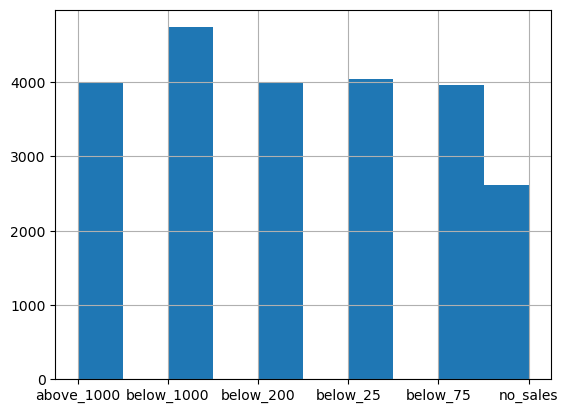

In [267]:
Data.loc[(Data.language=="English") & (Data.country=="IT"),"Sales"].hist()

<Axes: >

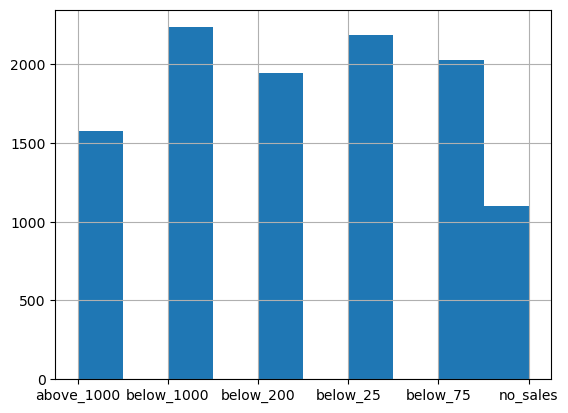

In [268]:
Data.loc[(Data.language!="English") & (Data.country=="IT"),"Sales"].hist()

In [270]:
Data["Label"]=Data.loc[:,"Sales"].astype("category").cat.codes

In [272]:
Data.to_excel("Processed.xlsx",index=False)

In [7]:
Data.membership.unique()

array(['Normal', 'Premium', 'Not Logged In'], dtype=object)

<Axes: >

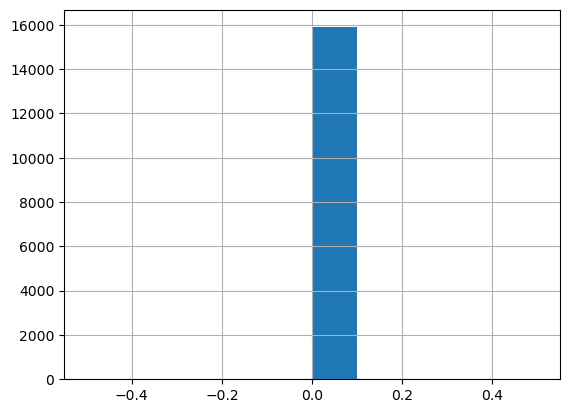

In [15]:
Data.loc[Data.membership=='Not Logged In',"sales"].hist()

In [28]:
Data.loc[Data.gender=='Unknown']

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method,Total_Sales
251,2017-03-15 00:06:40.209,2819,HTTP,2.137.104.119,21160,Others,--,Unknown,CH,Not Logged In,Spanish,0.0,No,0.0,Others,0.0
1555,2017-03-15 01:07:43.366,1739,HTTP,27.97.65.43,383,Android App,--,Unknown,SE,Not Logged In,Chinese,0.0,No,0.0,Credit Card,0.0
1782,2017-03-15 00:17:28.380,3682,HTTP,36.84.70.174,46,Chrome,--,Unknown,US,Not Logged In,Chinese,0.0,No,0.0,Credit Card,0.0
1783,2017-03-15 00:17:28.380,2891,HTTP,36.84.84.235,264,Chrome,--,Unknown,CA,Not Logged In,Chinese,0.0,No,0.0,Cash,0.0
2648,2017-03-15 02:02:33.807,2222,HTTP,45.61.35.152,387,Safari,--,Unknown,US,Not Logged In,Chinese,0.0,No,0.0,Others,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172504,2017-03-21 23:35:38.096,4057,TCP,123.195.68.236,44,Others,NaN,Unknown,CN,Not Logged In,English,0.0,No,0.0,Cash,0.0
172505,2017-03-21 23:35:39.296,4404,TCP,123.198.33.76,672,Others,NaN,Unknown,GB,Not Logged In,English,0.0,No,0.0,Debit Card,0.0
172506,2017-03-21 23:35:39.296,4865,TCP,123.201.179.246,11967,Others,NaN,Unknown,GB,Not Logged In,English,0.0,No,0.0,Credit Card,0.0
172673,2017-03-21 23:50:37.440,2496,TCP,125.202.113.81,46,Safari,NaN,Unknown,CA,Not Logged In,English,0.0,No,0.0,Credit Card,0.0


In [17]:
Data.loc[Data.Sales==False,"age"].value_counts()

age
0     18661
60        7
44        5
25        5
42        5
69        5
43        4
56        4
46        4
50        4
33        4
58        4
52        3
47        3
37        3
45        3
39        3
18        3
26        3
48        2
51        2
29        2
63        2
34        2
49        2
21        2
35        2
64        2
66        2
57        2
24        2
38        2
32        2
23        1
22        1
20        1
31        1
53        1
59        1
30        1
61        1
28        1
40        1
68        1
36        1
41        1
Name: count, dtype: int64